In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
coins = pd.read_json("Cryptocurrency-prices-Coinpaprika\coins.json")

In [3]:
coins

,id,name,symbol,rank,is_new,is_active,type
0,btc-bitcoin,Bitcoin,BTC,1,False,True,coin
1,eth-ethereum,Ethereum,ETH,2,False,True,coin
2,usdt-tether,Tether,USDT,3,False,True,token
3,ada-cardano,Cardano,ADA,4,False,True,coin
4,bnb-binance-coin,Binance Coin,BNB,5,False,True,coin
...,...,...,...,...,...,...,...
5802,itdr-itrader-today,iTrader Today,iTDR,0,True,False,token
5803,blast-blastoff,Blastoff,BLAST,0,True,False,token
5804,btcd-bitcoindark,BitcoinDark,BTCD,0,False,False,coin
5805,bcc-bitconnect,BitConnect,BCC,0,False,False,coin


In [4]:
import os,json

path_to_json = 'Cryptocurrency-prices-Coinpaprika/json_histdata/'

coins_data = dict()

for file_name in [file for file in os.listdir(path_to_json) if file.endswith('.json')]:
    with open(path_to_json + file_name) as json_file:
        data = json.load(json_file)
        coins_data[file_name] = data #nemoj ovo printat jer je jako veliko

In [41]:
#ne pokretat ponovo, spremljeno u csv obliku pa od tamo ucitavaš!!
import time
ext = '.json'

df_prices = pd.DataFrame()
df_volume = pd.DataFrame()
df_market_cap = pd.DataFrame()
t0 = time.time()

for key, value in coins_data.items():
    
    temp_df = pd.json_normalize(coins_data[key])
    
    if {'timestamp', 'price', 'volume_24h', 'market_cap'}.issubset(temp_df.columns):#to uzimam samo one koji imaju sve podatke..
        temp_df = temp_df.set_index('timestamp')
        
        temp_df_prices = temp_df.rename(columns={'price':key[:-len(ext)]})
        temp_df_prices = temp_df_prices.drop(labels=['volume_24h', 'market_cap'], axis=1)
        
        temp_df_volume = temp_df.rename(columns={'volume_24h':key[:-len(ext)]})
        temp_df_volume = temp_df_volume.drop(labels=['price', 'market_cap'], axis=1)
            
        temp_df_market_cap = temp_df.rename(columns={'market_cap':key[:-len(ext)]})
        temp_df_market_cap = temp_df_market_cap.drop(labels=['price', 'volume_24h'], axis=1)
      
        df_prices = pd.concat([df_prices, temp_df_prices], axis=1)
        df_volume = pd.concat([df_volume, temp_df_volume], axis=1)
        df_market_cap = pd.concat([df_market_cap, temp_df_market_cap], axis=1)
    
t1 = time.time()
print(t1-t0)

1741.8801519870758


In [8]:
df_prices = df_prices.sort_index()
df_prices.to_csv('prices.csv')

In [54]:
df_volume = df_volume.sort_index()
df_volume.to_csv('volume.csv')

In [60]:
df_market_cap = df_market_cap.sort_index()
df_market_cap.to_csv('market_cap.csv')

_____________________________________

Sada kad su podaci ucitani u csv tablice moramo ih organizirat u korisnom obliku...

In [2]:
#PRICES
original_prices_data = pd.read_csv('prices.csv', index_col='timestamp')
original_prices_data

,-money,0175-geely-automobile,0241-alibaba-health-information-technology-limited,0347-angang-steel,0358-jiangxi-copper,0522-asm-pacific-technology-limited,0728-china-telecom,0753-air-china,0857-petrochina,0916-china-longyuan-power,...,zum-zumcoin,zur-zurcoin,zxc-0xcert,zxt-zhixin-chain,zyd-zayedcoin,zyon-bitzyon,zyrk-zyrk,zyx-zyx,zzc-zozocoin,zzz-zzz-finance
timestamp,,,,,,,,,,,,,,,,,,,,,
2013-01-01T00:00:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-02T00:00:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03T00:00:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-04T00:00:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-05T00:00:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-27T00:00:00Z,NaN,2.49,2.58,0.638361,2.24,13.28,0.321657,0.822131,0.396151,1.43,...,NaN,0.001243,0.002927,NaN,NaN,0.000528,NaN,0.004162,NaN,NaN
2021-05-28T00:00:00Z,NaN,2.50,2.48,0.642824,2.32,13.23,0.316295,0.820785,0.401139,NaN,...,NaN,0.001299,0.002793,NaN,NaN,0.000566,NaN,0.004159,NaN,NaN
2021-05-29T00:00:00Z,NaN,2.49,2.46,0.641491,2.31,NaN,0.316301,NaN,0.401206,NaN,...,NaN,0.001465,0.002742,NaN,NaN,0.000612,NaN,0.004160,NaN,NaN


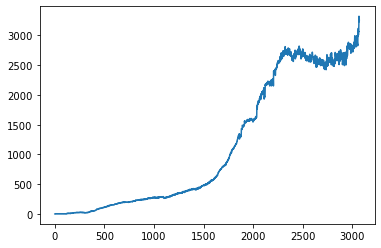

In [3]:
not_na = original_prices_data.notna().sum(axis=1).tolist()
x = [i for i in range(original_prices_data.shape[0])]
plt.plot(x, not_na)

In [4]:
# rekli smo da zelimo okvir od barem 700 dana pa sam odabrao ovako (krecemo od 2200og dana), ovisno o ovom dobit cemo drugaciji 
# broj valuta...probat cemo za pocetak ovako pa vidit kak ce ispast
time_cutoff = 2100
crop_data = original_prices_data.iloc[time_cutoff:, :]
crop_data

,-money,0175-geely-automobile,0241-alibaba-health-information-technology-limited,0347-angang-steel,0358-jiangxi-copper,0522-asm-pacific-technology-limited,0728-china-telecom,0753-air-china,0857-petrochina,0916-china-longyuan-power,...,zum-zumcoin,zur-zurcoin,zxc-0xcert,zxt-zhixin-chain,zyd-zayedcoin,zyon-bitzyon,zyrk-zyrk,zyx-zyx,zzc-zozocoin,zzz-zzz-finance
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-10-02T00:00:00Z,0.000888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000470,NaN,NaN,0.003863,NaN,NaN,NaN,0.09,NaN
2018-10-03T00:00:00Z,0.000955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000514,0.007308,NaN,0.004005,NaN,NaN,NaN,NaN,NaN
2018-10-04T00:00:00Z,0.000894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.007451,NaN,0.004483,NaN,NaN,NaN,0.04,NaN
2018-10-05T00:00:00Z,0.000783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000574,0.007421,NaN,0.004906,NaN,NaN,NaN,0.06,NaN
2018-10-06T00:00:00Z,0.000774,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000564,0.007028,NaN,0.003910,NaN,NaN,NaN,0.09,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-27T00:00:00Z,NaN,2.49,2.58,0.638361,2.24,13.28,0.321657,0.822131,0.396151,1.43,...,NaN,0.001243,0.002927,NaN,NaN,0.000528,NaN,0.004162,NaN,NaN
2021-05-28T00:00:00Z,NaN,2.50,2.48,0.642824,2.32,13.23,0.316295,0.820785,0.401139,NaN,...,NaN,0.001299,0.002793,NaN,NaN,0.000566,NaN,0.004159,NaN,NaN
2021-05-29T00:00:00Z,NaN,2.49,2.46,0.641491,2.31,NaN,0.316301,NaN,0.401206,NaN,...,NaN,0.001465,0.002742,NaN,NaN,0.000612,NaN,0.004160,NaN,NaN


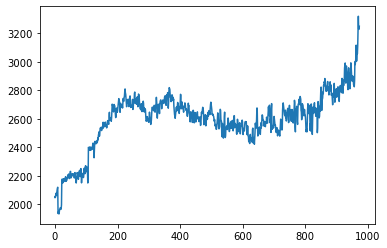

In [5]:
not_na = crop_data.notna().sum(axis=1).tolist()
x = [i for i in range(crop_data.shape[0])]
plt.plot(x, not_na)

In [6]:
#broj dionica koji ce nam ostat ako croppamo sve do 2200-og dana...
crop_data.iloc[0, :].notna().sum()

2048

In [7]:
pd.set_option('display.max_columns', 500)
crop_data = crop_data.loc[:, crop_data.iloc[0,:].notna()]
crop_data

,-money,0xbtc-0xbitcoin,1337-elite,1st-firstblood,1wo-1world,2give-2give,300-300-token,42-42-coin,611-sixeleven,808-808coin,888-octocoin,8bit-8bit,aaa-abulaba,aac-acute-angle-cloud,abc-alphabit,abjc-abjcoin-commerce,abl-airbloc,ablx-able,abt-arcblock,abx-arbidex,aby-artbyte,abyss-the-abyss,ac-asiacoin,ac3-ac3,acat-alphacat,acc-acchain,acc-adcoin,acdc-volt,ace-ace-tokenstars,aced-aced,aces-aces,acn-avoncoin,acoin-acoin,acp-anarchistsprime,acre-acre,act-achain,ada-cardano,adb-adbank,adc-audiocoin,adcn-asiadigicoin,adh-adhive,adi-aditus,adk-aidos-kuneen,adn-adrenaline,adt-adtoken,adx-adex,adz-adzcoin,ae-aeternity,aeg-aegeus,aeon-aeon,aerm-aerium,agi-singularitynet,aht-bowhead,ai-poly-ai,aib-advanced-internet-blocks,aid-aidcoin,aidoc-ai-doctor,aion-aion,aiq-artiqox,air-airtoken,ait-aichain,aix-aigang,aka-akroma,aky-akuya-coin,ali-ailink-token,alias-alias,alis-alis,alt-altcoin,altc-antilitecoin,altx-alttex,alx-alax,amb-ambrosus,amlt-amlt,amm-micromoney,amn-amon,amo-amo-coin,amp-amp,ams-amsterdamcoin,anc-anoncoin,ani-animecoin,anon-anon,ant-aragon,antx-antimatter,aoa-aurora,aog-smartofgiving,apc-alpacoin,aph-aphelion,apix-apix,apl-apollo-currency,appc-appcoins,apr-apr-coin,apx-apx,arb-arbit,arb-arbitrage,arc-advanced-technology-coin,arco-aquariuscoin,arct-arbitragect,ardr-ardor,arepa-arepacoin,arg-argentum,argus-argus,ari-aricoin,arion-arion,ark-ark,arlize-arlize,arn-aeron,aro-arionum,art-maecenas,ary-block-array,asafe2-allsafe,ast-airswap,at-aware,atb-atbcoin,atc-arbitracoin,atcc-atc-coin,atl-atlant,atm-atmchain,atmc-atmcoin,atmi-atonomi,atmos-atmos,atn-atn,atom-atomic-coin,ats-authorship,atx-aston,au-aurumcoin,auc-auctus,aur-auroracoin,aura-aurora-dao,auto-cube,aux-auxilium,av-avatarcoin,ava-travala,avh-animation-vision-cash,avinoc-avinoc,avt-aventus,axiom-axiom,axpr-axpire,azart-azart,b2b-b2bx,b2x-segwit2x,baas-baasid,bac-bitalphacoin,banca-banca,bank-bank-coin,bas-bitasean,bat-basic-attention-token,bat-batcoin,bax-babb,bay-bitbay,bbc-tradove-b2bcoin,bbk-bitblocks,bbk-brickblock,bbn-banyan-network,bbo-bigbom,bbp-biblepay,bbr-boolberry,bbs-bbscoin,bbt-bitboost,bca-bitcoin-atom,bcd-bitcoin-diamond,bcdn-blockcdn,bcf-bitcoin-fast,bch-bitcoin-cash,bci-bitcoin-interest,bcn-bytecoin,bco-bridgecoin,bcpt-blockmason-credit-protocol,bcv-bitcapitalvendor,bcx-bitcoinx,bcy-bitcrystals,bdg-bitdegree,bdl-bitdeal,bee-bee-token,beet-beetle-coin,bela-bela,ben-bitcoen,benji-benjirolls,bern-berncash,berry-rentberry,best-bestchain,bet-daobet,betr-betterbetting,bez-bezop,bff-bffdoom,bft-bnktothefuture,bhpc-bhpcash,bifi-bitcoin-file,bigup-bigup,bio-biocoin,bip-bipcoin,bir-birake,birds-birds,bis-bismuth,bit-bitrewards,bit-first-bitcoin,bitb-bean-cash,bitcf-first-bitcoin-capital,bitcny-bitcny,bitf-bitf,bitg-bitgreen,bitok-bitok,bits-bitstar,bits-bitswift,bitv-bitvier,bitx-bitscreener-token,bitz-bitz,bix-bibox-token,bkx-bankex,black-eosblack,blazr-blazercoin,blc-blakecoin,blk-blackcoin,bln-bolenum,block-blocknet,blt-bloom,blu-bluecoin,blue-blue-protocol,blz-blazecoin,blz-bluzelle,bmc-blackmoon,bmh-blockmesh,bmx-bitmart-token,bnb-binance-coin,bnc-bionic,bnd-blocknode,bnk-bankera,bnn-brokernekonetwork,bnt-bancor,bnty-bounty0x,bnx-bnrtxcoin,boat-boat,bob-bobs-repair,boc-bingocoin,boe-bodhi-eth,boli-bolivarcoin,bon-bonpay,bos-boscoin,bot-bodhi,bouts-boutspro,box-contentbox,boxx-boxx-token-blockparty,bpl-blockpool,bpt-blockport,bq-bitqy,bqt-blockchain-quotations-index-token,brain-braincoin,brat-brother,brd-bread,bria-briacoin,brit-britcoin,...,ucash-universal-cash,ucom-united-crypto-community,uct-ubique-chain-of-things,ufo-uniform-fiscal-object,ufr-upfiring,ugc-ugchain,uip-unlimitedip,uis-unitus,ukg-unikoin-gold,unb-unbreakablecoin,uni-universe,unic-unicoin,unify-unify,unit-universal-currency,units-gameunits,uno-unobtanium,unrc-universalroyalcoin,up-uptoken,upp-sentinel-protocol,uqc-uquid-coin,urals-uralscoin,urc-unrealcoin,usc-ultimate-secure-cash,usdt-tether,use-usechain-token,usnbt-nubits,ut-ulord,utc-ultracoin,utk-utrust,utnp-universa,utt-united-traders-tok

In [8]:
pd.reset_option('display.max_columns')

In [9]:
#provjera jel stvarno niti jedna ne pocinje s nan
crop_data.iloc[0, :].notna().sum()

2048

In [10]:
#broj kolona koje imaju barem jednu nan vrijednost
def count_nan_cols(df):
    cnt = 0
    for col_name in df.columns.values:
        if df[col_name].isna().any():
            cnt += 1
    print(cnt)

In [11]:
#broj kolona koje sadrze nan
count_nan_cols(crop_data)

1495


In [12]:
def interpolate_prices(s: pd.Series):
    if s.isna().sum() == 0:
        return s
    
    for i in range(1, len(s)):
        if pd.isna(s[i]):
            if s[i:].notna().any():
                s[i] = s[i-1]
        else:
            continue
            
    return s

In [13]:
data = crop_data.copy()
data.apply(lambda x: interpolate_prices(x))
data

,-money,0xbtc-0xbitcoin,1337-elite,1st-firstblood,1wo-1world,2give-2give,300-300-token,42-42-coin,611-sixeleven,808-808coin,...,zpb-zebi,zpr-zper,zpt-zeepin,zrc-zrcoin,zrx-0x,zsc-zeusshield,zse-zsecoin,zur-zurcoin,zyd-zayedcoin,zzc-zozocoin
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-10-02T00:00:00Z,0.000888,0.51,0.000068,0.066936,0.092360,0.003821,288.00,19748.84,0.113873,0.000001,...,0.013536,0.005312,0.022796,1.93,0.645667,0.004144,0.011361,0.000470,0.003863,0.09
2018-10-03T00:00:00Z,0.000955,0.46,0.000067,0.065669,0.100713,0.003767,282.93,21054.95,0.111214,0.000001,...,0.013552,0.005515,0.022053,2.04,0.620525,0.004007,0.012625,0.000514,0.004005,0.09
2018-10-04T00:00:00Z,0.000894,0.42,0.000065,0.066851,0.102800,0.003714,218.27,23659.06,0.125188,0.000001,...,0.014082,0.005422,0.022365,1.83,0.638271,0.004717,0.012532,0.000514,0.004483,0.04
2018-10-05T00:00:00Z,0.000783,0.41,0.000066,0.070235,0.102303,0.003763,212.79,23103.57,0.123152,0.000001,...,0.014074,0.005552,0.022187,1.79,0.638822,0.004661,0.013156,0.000574,0.004906,0.06
2018-10-06T00:00:00Z,0.000774,0.41,0.000066,0.075988,0.102116,0.003668,225.60,23574.41,0.106005,0.000001,...,0.014091,0.005794,0.022452,1.82,0.651290,0.004395,0.015301,0.000564,0.003910,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-27T00:00:00Z,NaN,1.12,0.003931,2.986188,0.092420,0.000242,NaN,76259.12,0.098787,NaN,...,0.005599,0.000649,0.001497,0.19,1.119865,0.000269,NaN,0.001243,NaN,NaN
2021-05-28T00:00:00Z,NaN,1.09,0.002266,3.062727,0.087216,0.000233,NaN,65761.19,0.098787,NaN,...,0.005402,0.000609,0.001381,0.18,1.012382,0.000300,NaN,0.001299,NaN,NaN
2021-05-29T00:00:00Z,NaN,0.89,0.006766,3.032851,0.084017,0.000690,NaN,64300.03,0.098787,NaN,...,0.005320,0.000609,0.001211,0.18,0.934565,0.000274,NaN,0.001465,NaN,NaN


In [14]:
count_nan_cols(data)

842


In [15]:
final_data = data[0:data.shape[0]-1]
final_data

,-money,0xbtc-0xbitcoin,1337-elite,1st-firstblood,1wo-1world,2give-2give,300-300-token,42-42-coin,611-sixeleven,808-808coin,...,zpb-zebi,zpr-zper,zpt-zeepin,zrc-zrcoin,zrx-0x,zsc-zeusshield,zse-zsecoin,zur-zurcoin,zyd-zayedcoin,zzc-zozocoin
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-10-02T00:00:00Z,0.000888,0.51,0.000068,0.066936,0.092360,0.003821,288.00,19748.84,0.113873,0.000001,...,0.013536,0.005312,0.022796,1.93,0.645667,0.004144,0.011361,0.000470,0.003863,0.09
2018-10-03T00:00:00Z,0.000955,0.46,0.000067,0.065669,0.100713,0.003767,282.93,21054.95,0.111214,0.000001,...,0.013552,0.005515,0.022053,2.04,0.620525,0.004007,0.012625,0.000514,0.004005,0.09
2018-10-04T00:00:00Z,0.000894,0.42,0.000065,0.066851,0.102800,0.003714,218.27,23659.06,0.125188,0.000001,...,0.014082,0.005422,0.022365,1.83,0.638271,0.004717,0.012532,0.000514,0.004483,0.04
2018-10-05T00:00:00Z,0.000783,0.41,0.000066,0.070235,0.102303,0.003763,212.79,23103.57,0.123152,0.000001,...,0.014074,0.005552,0.022187,1.79,0.638822,0.004661,0.013156,0.000574,0.004906,0.06
2018-10-06T00:00:00Z,0.000774,0.41,0.000066,0.075988,0.102116,0.003668,225.60,23574.41,0.106005,0.000001,...,0.014091,0.005794,0.022452,1.82,0.651290,0.004395,0.015301,0.000564,0.003910,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-26T00:00:00Z,NaN,0.97,0.000091,2.804070,0.093784,0.000363,NaN,78110.96,0.098787,NaN,...,0.005650,0.000519,0.001618,0.20,1.078700,0.000284,NaN,0.001144,NaN,NaN
2021-05-27T00:00:00Z,NaN,1.12,0.003931,2.986188,0.092420,0.000242,NaN,76259.12,0.098787,NaN,...,0.005599,0.000649,0.001497,0.19,1.119865,0.000269,NaN,0.001243,NaN,NaN
2021-05-28T00:00:00Z,NaN,1.09,0.002266,3.062727,0.087216,0.000233,NaN,65761.19,0.098787,NaN,...,0.005402,0.000609,0.001381,0.18,1.012382,0.000300,NaN,0.001299,NaN,NaN


In [16]:
count_nan_cols(final_data)

806


In [17]:
#ovdje sam ipak uzeo samo one koje nemaju niti jednu nan vrijednost
final_data = final_data.dropna(axis=1)
final_data

,0xbtc-0xbitcoin,1337-elite,1st-firstblood,1wo-1world,2give-2give,42-42-coin,611-sixeleven,aaa-abulaba,aac-acute-angle-cloud,abc-alphabit,...,zla-zilla,zmn-zmine,zne-zonecoin,zpb-zebi,zpr-zper,zpt-zeepin,zrc-zrcoin,zrx-0x,zsc-zeusshield,zur-zurcoin
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-10-02T00:00:00Z,0.51,0.000068,0.066936,0.092360,0.003821,19748.84,0.113873,0.145554,0.010335,19.582467,...,0.033272,0.022273,0.001805,0.013536,0.005312,0.022796,1.93,0.645667,0.004144,0.000470
2018-10-03T00:00:00Z,0.46,0.000067,0.065669,0.100713,0.003767,21054.95,0.111214,0.117332,0.010607,16.315831,...,0.032360,0.020213,0.002026,0.013552,0.005515,0.022053,2.04,0.620525,0.004007,0.000514
2018-10-04T00:00:00Z,0.42,0.000065,0.066851,0.102800,0.003714,23659.06,0.125188,0.110490,0.010664,20.506201,...,0.032791,0.019442,0.001644,0.014082,0.005422,0.022365,1.83,0.638271,0.004717,0.000514
2018-10-05T00:00:00Z,0.41,0.000066,0.070235,0.102303,0.003763,23103.57,0.123152,0.083531,0.010594,20.490312,...,0.032610,0.019209,0.001453,0.014074,0.005552,0.022187,1.79,0.638822,0.004661,0.000574
2018-10-06T00:00:00Z,0.41,0.000066,0.075988,0.102116,0.003668,23574.41,0.106005,0.072883,0.010543,20.238747,...,0.033134,0.019287,0.001453,0.014091,0.005794,0.022452,1.82,0.651290,0.004395,0.000564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-26T00:00:00Z,0.97,0.000091,2.804070,0.093784,0.000363,78110.96,0.098787,0.000083,0.009778,0.001368,...,0.004141,0.004741,0.001300,0.005650,0.000519,0.001618,0.20,1.078700,0.000284,0.001144
2021-05-27T00:00:00Z,1.12,0.003931,2.986188,0.092420,0.000242,76259.12,0.098787,0.000083,0.009747,0.001993,...,0.004372,0.004738,0.001300,0.005599,0.000649,0.001497,0.19,1.119865,0.000269,0.001243
2021-05-28T00:00:00Z,1.09,0.002266,3.062727,0.087216,0.000233,65761.19,0.098787,0.000083,0.009977,0.002234,...,0.004067,0.004738,0.001300,0.005402,0.000609,0.001381,0.18,1.012382,0.000300,0.001299


In [18]:
final_data.isna().sum().sum()

0

dakle dobili smo okvir s cijenama za 1242 valuta kroz 972 dana, bez ijedne nan vrijednosti..

In [19]:
final_data.shape

(972, 1242)

moramo izbacit sve koji su imali cijenu nula

In [20]:
def find_zero_columns(df):
    zero_cols = []
    for c in df.columns:
        if 0.0 in df[c].values:
            zero_cols.append(c)
    return zero_cols

In [21]:
zero_cols = find_zero_columns(final_data)
final_data = final_data.drop(labels=zero_cols, axis=1)
final_data.shape

(972, 1162)

Zelimo tjedne povrate

In [22]:
final_data.index = pd.to_datetime(final_data.index)

In [23]:
weekly_data = final_data.resample('W').asfreq().pct_change()[1:]
weekly_data

,0xbtc-0xbitcoin,1337-elite,1st-firstblood,1wo-1world,2give-2give,42-42-coin,611-sixeleven,aaa-abulaba,aac-acute-angle-cloud,abc-alphabit,...,zla-zilla,zmn-zmine,zne-zonecoin,zpb-zebi,zpr-zper,zpt-zeepin,zrc-zrcoin,zrx-0x,zsc-zeusshield,zur-zurcoin
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-10-14 00:00:00+00:00,-0.076923,-0.102941,-0.158385,-0.012359,-0.110802,0.002503,0.153286,0.533248,-0.209554,-0.290564,...,-0.206807,0.161226,3.532691,-0.089057,-0.089302,-0.069753,-0.005495,0.076072,-0.081568,0.020654
2018-10-21 00:00:00+00:00,-0.083333,-0.016393,0.154117,-0.044933,-0.025986,-0.017970,0.240781,-0.068697,0.273673,-0.380608,...,1.004136,0.034472,0.000000,-0.009939,0.035821,0.094946,0.005525,0.209170,0.118505,0.000000
2018-10-28 00:00:00+00:00,0.121212,-0.066667,-0.136459,0.033079,0.020572,-0.034560,-0.161693,-0.604540,-0.117664,-0.077067,...,-0.268936,-0.101682,-0.824324,0.031137,-0.075927,0.029154,-0.087912,-0.098460,-0.073714,0.645868
2018-11-04 00:00:00+00:00,0.081081,-0.071429,0.053840,0.557664,-0.122520,-0.141469,0.039008,-0.480019,-0.070433,-0.279764,...,-0.080923,-0.049607,0.000000,0.033696,-0.201338,-0.034105,0.114458,-0.017207,-0.078045,-0.279713
2018-11-11 00:00:00+00:00,0.150000,-0.173077,-0.040715,0.053854,-0.016511,0.136955,-0.082525,-0.609574,-0.101885,-0.045256,...,0.234757,0.005965,0.572169,-0.029139,-0.045026,-0.160376,0.064865,-0.116823,-0.069387,-0.365576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-02 00:00:00+00:00,0.136364,24.873950,0.375366,0.016422,-0.006160,0.144280,0.580437,-0.052863,0.106323,0.589089,...,0.334217,0.034111,0.155682,0.044927,0.481428,0.065597,0.250000,0.383821,0.220490,0.056886
2021-05-09 00:00:00+00:00,0.453333,1.634946,-0.198275,-0.028509,0.793388,-0.079119,-0.931938,-0.572093,-0.046285,4.179202,...,-0.057382,0.000000,-0.336283,-0.062598,-0.436087,-0.055665,-0.033333,0.015250,0.104015,-0.223796
2021-05-16 00:00:00+00:00,0.082569,-0.982057,-0.258720,-0.180470,-0.221198,-0.170742,0.000000,3.978261,0.029585,-0.703655,...,-0.163194,0.000000,-0.291605,-0.070263,-0.217960,0.436893,-0.206897,-0.165984,-0.191736,0.503650


In [24]:
weekly_data.index[0].dayofweek #baca 6 dakle gleda od nedjelje do nedjelje...

6

In [25]:
# broj nan vrijednosti
weekly_data.isna().sum().sum()

0

In [26]:
# broj inf vrijednosti
np.isinf(weekly_data).sum().sum()

0

Postojat ce neke valute koje ce imat ogromne tjedne povrate koje ne zelimo pa to treba detektirat i izbacit...

In [27]:
sorted(weekly_data.max().values, reverse=True)

[12050985965807.154,
 109903934.92446809,
 54349364.69565218,
 3693541.1363636362,
 1347069.623188406,
 846525.2178403756,
 753109.1428571428,
 414770.4305555556,
 233323.42696629214,
 15331.0,
 10903.858695652174,
 9894.272727272728,
 9825.628039153773,
 5019.099999999999,
 3476.177318911832,
 2914.1151832460732,
 2828.8333333333335,
 2627.430956119329,
 2004.1545613015687,
 1821.946653099789,
 1131.168918918919,
 806.0,
 729.9441860465116,
 619.0,
 596.2965782563559,
 393.62728576550734,
 392.06250000000006,
 373.0,
 363.28690326633165,
 334.6538461538462,
 319.00000000000006,
 297.9296275708727,
 234.6958405458208,
 227.228390461997,
 217.00000000000003,
 205.4766355140187,
 205.13251950667,
 193.78419071518192,
 188.52528837622006,
 180.862325108115,
 167.0,
 164.26065162907267,
 162.3494318181818,
 159.65,
 157.28378378378378,
 145.72093023255815,
 143.01960784313727,
 140.78571428571428,
 137.55689266693977,
 110.72727272727272,
 104.09263157894736,
 96.82142857142858,
 94.399999

In [28]:
#cini mi se da ih dovoljno ima maksimalne povrate manje od 20...mozda cak mozemo i za 10
print((weekly_data.max().values < 20).sum())
print((weekly_data.max().values < 10).sum())

1037
978


In [29]:
# nadi kriptovalute koje sadrze povrat veci od definiranog limita
def find_big_returns(df, limit):
    outlier_cols = []
    for c in df.columns:
        if df[c].max() > limit:
            outlier_cols.append(c)
    return outlier_cols

In [30]:
# ovdje sam radio sa limitom 10
#outlier_cols = find_big_returns(weekly_data, 10)
outlier_cols = find_big_returns(weekly_data, 5)
len(outlier_cols)

308

In [31]:
weekly_data = weekly_data.drop(labels=outlier_cols, axis=1)
weekly_data

,0xbtc-0xbitcoin,1st-firstblood,1wo-1world,2give-2give,42-42-coin,abl-airbloc,abt-arcblock,abx-arbidex,abyss-the-abyss,acat-alphacat,...,zipt-zippie,zla-zilla,zmn-zmine,zne-zonecoin,zpb-zebi,zpr-zper,zpt-zeepin,zrc-zrcoin,zrx-0x,zsc-zeusshield
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-10-14 00:00:00+00:00,-0.076923,-0.158385,-0.012359,-0.110802,0.002503,-0.167126,-0.095966,-0.088312,-0.042885,-0.199564,...,-0.115416,-0.206807,0.161226,3.532691,-0.089057,-0.089302,-0.069753,-0.005495,0.076072,-0.081568
2018-10-21 00:00:00+00:00,-0.083333,0.154117,-0.044933,-0.025986,-0.017970,0.074951,0.050680,-0.143160,0.133190,0.149864,...,0.376441,1.004136,0.034472,0.000000,-0.009939,0.035821,0.094946,0.005525,0.209170,0.118505
2018-10-28 00:00:00+00:00,0.121212,-0.136459,0.033079,0.020572,-0.034560,-0.100569,-0.035994,0.430140,-0.019996,-0.142180,...,-0.057779,-0.268936,-0.101682,-0.824324,0.031137,-0.075927,0.029154,-0.087912,-0.098460,-0.073714
2018-11-04 00:00:00+00:00,0.081081,0.053840,0.557664,-0.122520,-0.141469,-0.133261,-0.113805,0.433844,-0.094082,-0.002762,...,-0.012264,-0.080923,-0.049607,0.000000,0.033696,-0.201338,-0.034105,0.114458,-0.017207,-0.078045
2018-11-11 00:00:00+00:00,0.150000,-0.040715,0.053854,-0.016511,0.136955,-0.051680,-0.048706,-0.043478,-0.043722,-0.049861,...,-0.056325,0.234757,0.005965,0.572169,-0.029139,-0.045026,-0.160376,0.064865,-0.116823,-0.069387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-02 00:00:00+00:00,0.136364,0.375366,0.016422,-0.006160,0.144280,2.027271,0.098094,0.148448,-0.008123,0.002627,...,0.232229,0.334217,0.034111,0.155682,0.044927,0.481428,0.065597,0.250000,0.383821,0.220490
2021-05-09 00:00:00+00:00,0.453333,-0.198275,-0.028509,0.793388,-0.079119,-0.416550,0.053950,0.675015,0.279111,1.271616,...,0.413991,-0.057382,0.000000,-0.336283,-0.062598,-0.436087,-0.055665,-0.033333,0.015250,0.104015
2021-05-16 00:00:00+00:00,0.082569,-0.258720,-0.180470,-0.221198,-0.170742,-0.347345,-0.165969,0.000000,-0.320037,-0.240292,...,-0.016614,-0.163194,0.000000,-0.291605,-0.070263,-0.217960,0.436893,-0.206897,-0.165984,-0.191736


Zelimo sortirat podatke po zadnjem market capu...

In [32]:
market_cap = pd.read_csv('market_cap.csv', index_col='timestamp')

In [33]:
market_cap = market_cap[weekly_data.columns]
market_cap

,0xbtc-0xbitcoin,1st-firstblood,1wo-1world,2give-2give,42-42-coin,abl-airbloc,abt-arcblock,abx-arbidex,abyss-the-abyss,acat-alphacat,...,zipt-zippie,zla-zilla,zmn-zmine,zne-zonecoin,zpb-zebi,zpr-zper,zpt-zeepin,zrc-zrcoin,zrx-0x,zsc-zeusshield
timestamp,,,,,,,,,,,,,,,,,,,,,
2013-01-01T00:00:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-02T00:00:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03T00:00:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-04T00:00:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-05T00:00:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-27T00:00:00Z,6435569.0,0.0,3439835.0,127848.0,3202883.0,10264471.0,12917489.0,415666.0,10836989.0,2553218.0,...,0.0,262338.0,698028.0,3356.0,4152014.0,817635.0,748559.0,969040.0,942807296.0,314109.0
2021-05-28T00:00:00Z,6240196.0,0.0,3246146.0,122806.0,2761970.0,9626610.0,12705751.0,NaN,10194821.0,2211685.0,...,0.0,243992.0,NaN,NaN,4008968.0,767087.0,690691.0,914162.0,852345654.0,351083.0
2021-05-29T00:00:00Z,5133623.0,0.0,3127084.0,363792.0,2700601.0,8957815.0,13968408.0,NaN,10064548.0,2283126.0,...,0.0,221194.0,NaN,NaN,3950295.0,NaN,605267.0,880046.0,786830502.0,320033.0


In [34]:
last_market_caps = np.nan_to_num(market_cap.iloc[-1,:], nan=0)
sorted_idx = np.argsort(last_market_caps)[::-1]
market_cap_sorted = market_cap.iloc[:,sorted_idx]
market_cap_sorted

,btc-bitcoin,eth-ethereum,usdt-tether,ada-cardano,bnb-binance-coin,xrp-xrp,doge-dogecoin,bch-bitcoin-cash,ltc-litecoin,link-chainlink,...,sls-salus,sno-savenode,spx-sp-500,sop-sopay,spank-spankchain,sphr-sphere,cen-centaure,cc-cybercoin,moneta-moneta,idh-indahash
timestamp,,,,,,,,,,,,,,,,,,,,,
2013-01-01T00:00:00Z,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-02T00:00:00Z,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03T00:00:00Z,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-04T00:00:00Z,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-05T00:00:00Z,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-27T00:00:00Z,727270539455,3.212994e+11,6.123937e+10,5.431188e+10,5.333034e+10,4.582358e+10,4.419896e+10,1.415216e+10,13201737804,1.249405e+10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-28T00:00:00Z,686127053225,2.966350e+11,6.141521e+10,4.983617e+10,4.931410e+10,4.197502e+10,4.154549e+10,1.315463e+10,12244460610,1.121312e+10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-29T00:00:00Z,660714370414,2.788474e+11,6.159685e+10,4.660244e+10,4.686018e+10,4.006668e+10,3.957390e+10,1.255574e+10,11720611341,1.023292e+10,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0


In [35]:
weekly_data_sorted = weekly_data[market_cap_sorted.columns]
weekly_data_sorted

,btc-bitcoin,eth-ethereum,usdt-tether,ada-cardano,bnb-binance-coin,xrp-xrp,doge-dogecoin,bch-bitcoin-cash,ltc-litecoin,link-chainlink,...,sls-salus,sno-savenode,spx-sp-500,sop-sopay,spank-spankchain,sphr-sphere,cen-centaure,cc-cybercoin,moneta-moneta,idh-indahash
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-10-14 00:00:00+00:00,-0.050142,-0.118952,-0.019802,-0.116748,-0.088035,-0.126140,-0.080240,-0.131674,-0.085648,-0.045628,...,-0.046919,-0.374390,-0.043366,-0.072660,-0.122240,-0.005649,0.111537,0.307692,0.070707,-0.147783
2018-10-21 00:00:00+00:00,0.041566,0.044321,0.000000,0.059580,0.029462,0.105846,-0.113374,0.014621,0.008175,0.161747,...,0.091998,-0.251542,-0.000361,-0.097584,0.059917,0.170467,-0.284238,0.000000,0.000000,0.023947
2018-10-28 00:00:00+00:00,-0.000894,-0.005215,0.020202,-0.046624,-0.008180,-0.001324,-0.100130,-0.022614,-0.020978,0.183164,...,0.204521,-0.563465,-0.035411,-0.036456,-0.084430,0.501238,-0.247292,-0.147059,-0.344340,0.093548
2018-11-04 00:00:00+00:00,-0.028426,-0.023087,-0.019802,0.004761,-0.022924,-0.013456,-0.107659,0.204102,0.000067,0.162131,...,-0.070244,-0.524892,0.020509,-0.136721,-0.134989,-0.244335,-0.350919,0.051724,0.007194,-0.038643
2018-11-11 00:00:00+00:00,0.000155,0.038994,0.000000,0.019114,-0.013792,0.099539,-0.140081,0.004790,-0.023631,-0.008288,...,-0.072005,0.000162,0.020097,-0.207284,-0.141697,-0.163610,-0.258621,0.049180,0.307143,0.030991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-02 00:00:00+00:00,0.144037,0.294335,0.000000,0.197870,0.237187,0.485080,0.416620,0.266390,0.193858,0.249795,...,0.015733,0.150391,0.002916,-0.066225,0.211760,0.182149,0.000000,-0.024000,0.468944,0.051466
2021-05-09 00:00:00+00:00,0.020887,0.329138,0.000000,0.299102,0.063239,-0.034729,0.433626,0.382300,0.315223,0.237769,...,-0.072476,0.006791,-0.004226,0.028369,0.148269,0.188762,0.118952,0.155738,0.207188,-0.208481
2021-05-16 00:00:00+00:00,-0.177889,-0.049192,0.000000,0.321954,-0.122399,-0.008096,-0.055921,-0.113356,-0.137525,-0.144160,...,-0.246952,-0.069140,0.001849,-0.089655,-0.292507,-0.290375,-0.091892,0.397163,-0.215412,0.352183


In [36]:
weekly_data_sorted.to_csv('final_weekly_returns.csv')